In [106]:
import pandas as pd
import numpy as np
import sys
import re

In [107]:
#open the txt files:
data = pd.read_csv('communities.txt', sep=",", header=None)
data = data.replace("?", np.nan)


In [127]:
from sklearn.preprocessing import Imputer
#preparing data, pick columns 5-128, deal with missing values
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
tmpdata = data[data.columns[5:]]
imp.fit(tmpdata)
trans = imp.transform(tmpdata)
pdf = pd.DataFrame(trans)

In [109]:
#split train and test data
traindata = pdf.loc[0:1495]
testdata = pdf.loc[1495:]

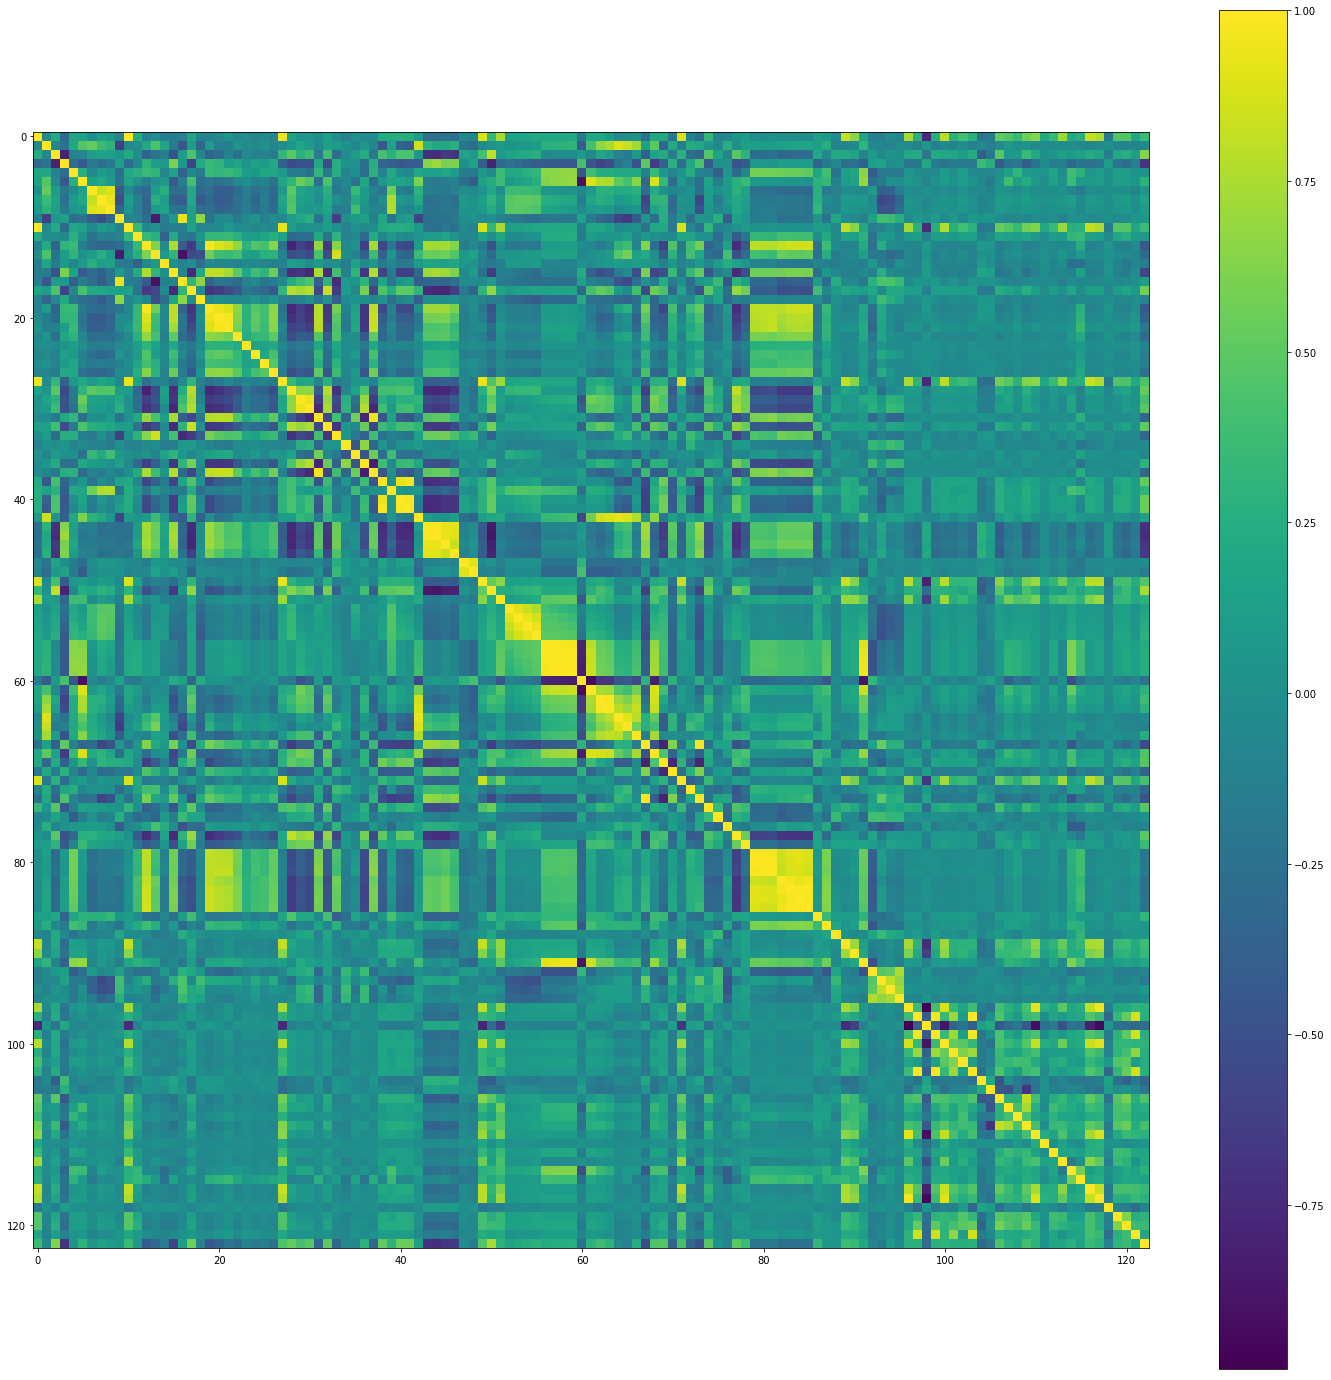

In [110]:
#polt correlation matrix for all predictors' columns (1c)
import matplotlib.pyplot as plt
import matplotlib as pt
plt.figure(figsize=(25,25))
plt.imshow(pdf.corr())

plt.colorbar()
plt.savefig("cormatrix.png")
plt.show()

In [111]:
#1d calcalate CV
varlst = []
for a in pdf.columns:
    varlst.append(pdf[a].std()/pdf[a].mean())
print(varlst)
print(len(varlst))

[2.203502536390972, 0.3532983018683109, 1.4109203963756864, 0.3237815624993411, 1.3591621938222074, 1.614277791710685, 0.36583986883972397, 0.29069288841904145, 0.4951605143654288, 0.42344170889026195, 2.0017436381957676, 0.6388488712113656, 0.5797533935755996, 0.3277100586060616, 0.7000301156104908, 0.35923994722340613, 0.36851263032540155, 0.699030504203365, 0.3496390828575848, 0.527731885342079, 0.545633428419145, 0.5075521907214038, 0.5894690036844645, 0.8096850868666168, 0.6061938508790911, 0.6713550533589168, 0.4739597186074789, 2.304969714852185, 0.7539801744357952, 0.6756002166771716, 0.5282862664983298, 0.5784008385663657, 0.5561327984953394, 0.3473272454905018, 0.5105803413512793, 0.39822567574896933, 0.5084613109923771, 0.42210585589961375, 0.3955833690023806, 0.40381161614997696, 0.3592727036887422, 0.37146815336205474, 0.31695474768257587, 0.3306111369901614, 0.3324758807131056, 0.3294258419264571, 0.32855094726896933, 0.33624845001518155, 0.3327221175201113, 2.99419644948

In [112]:
# print(newdata[newdata.columns[3]])
# find the 11 biggest cv and their indexes in CV list
tmp=sorted(varlst, reverse= True)
indlst =[]
for val in tmp[0:11]:
    indlst.append(varlst.index(val))
print(indlst)


[108, 90, 107, 106, 89, 119, 49, 51, 120, 116, 27]


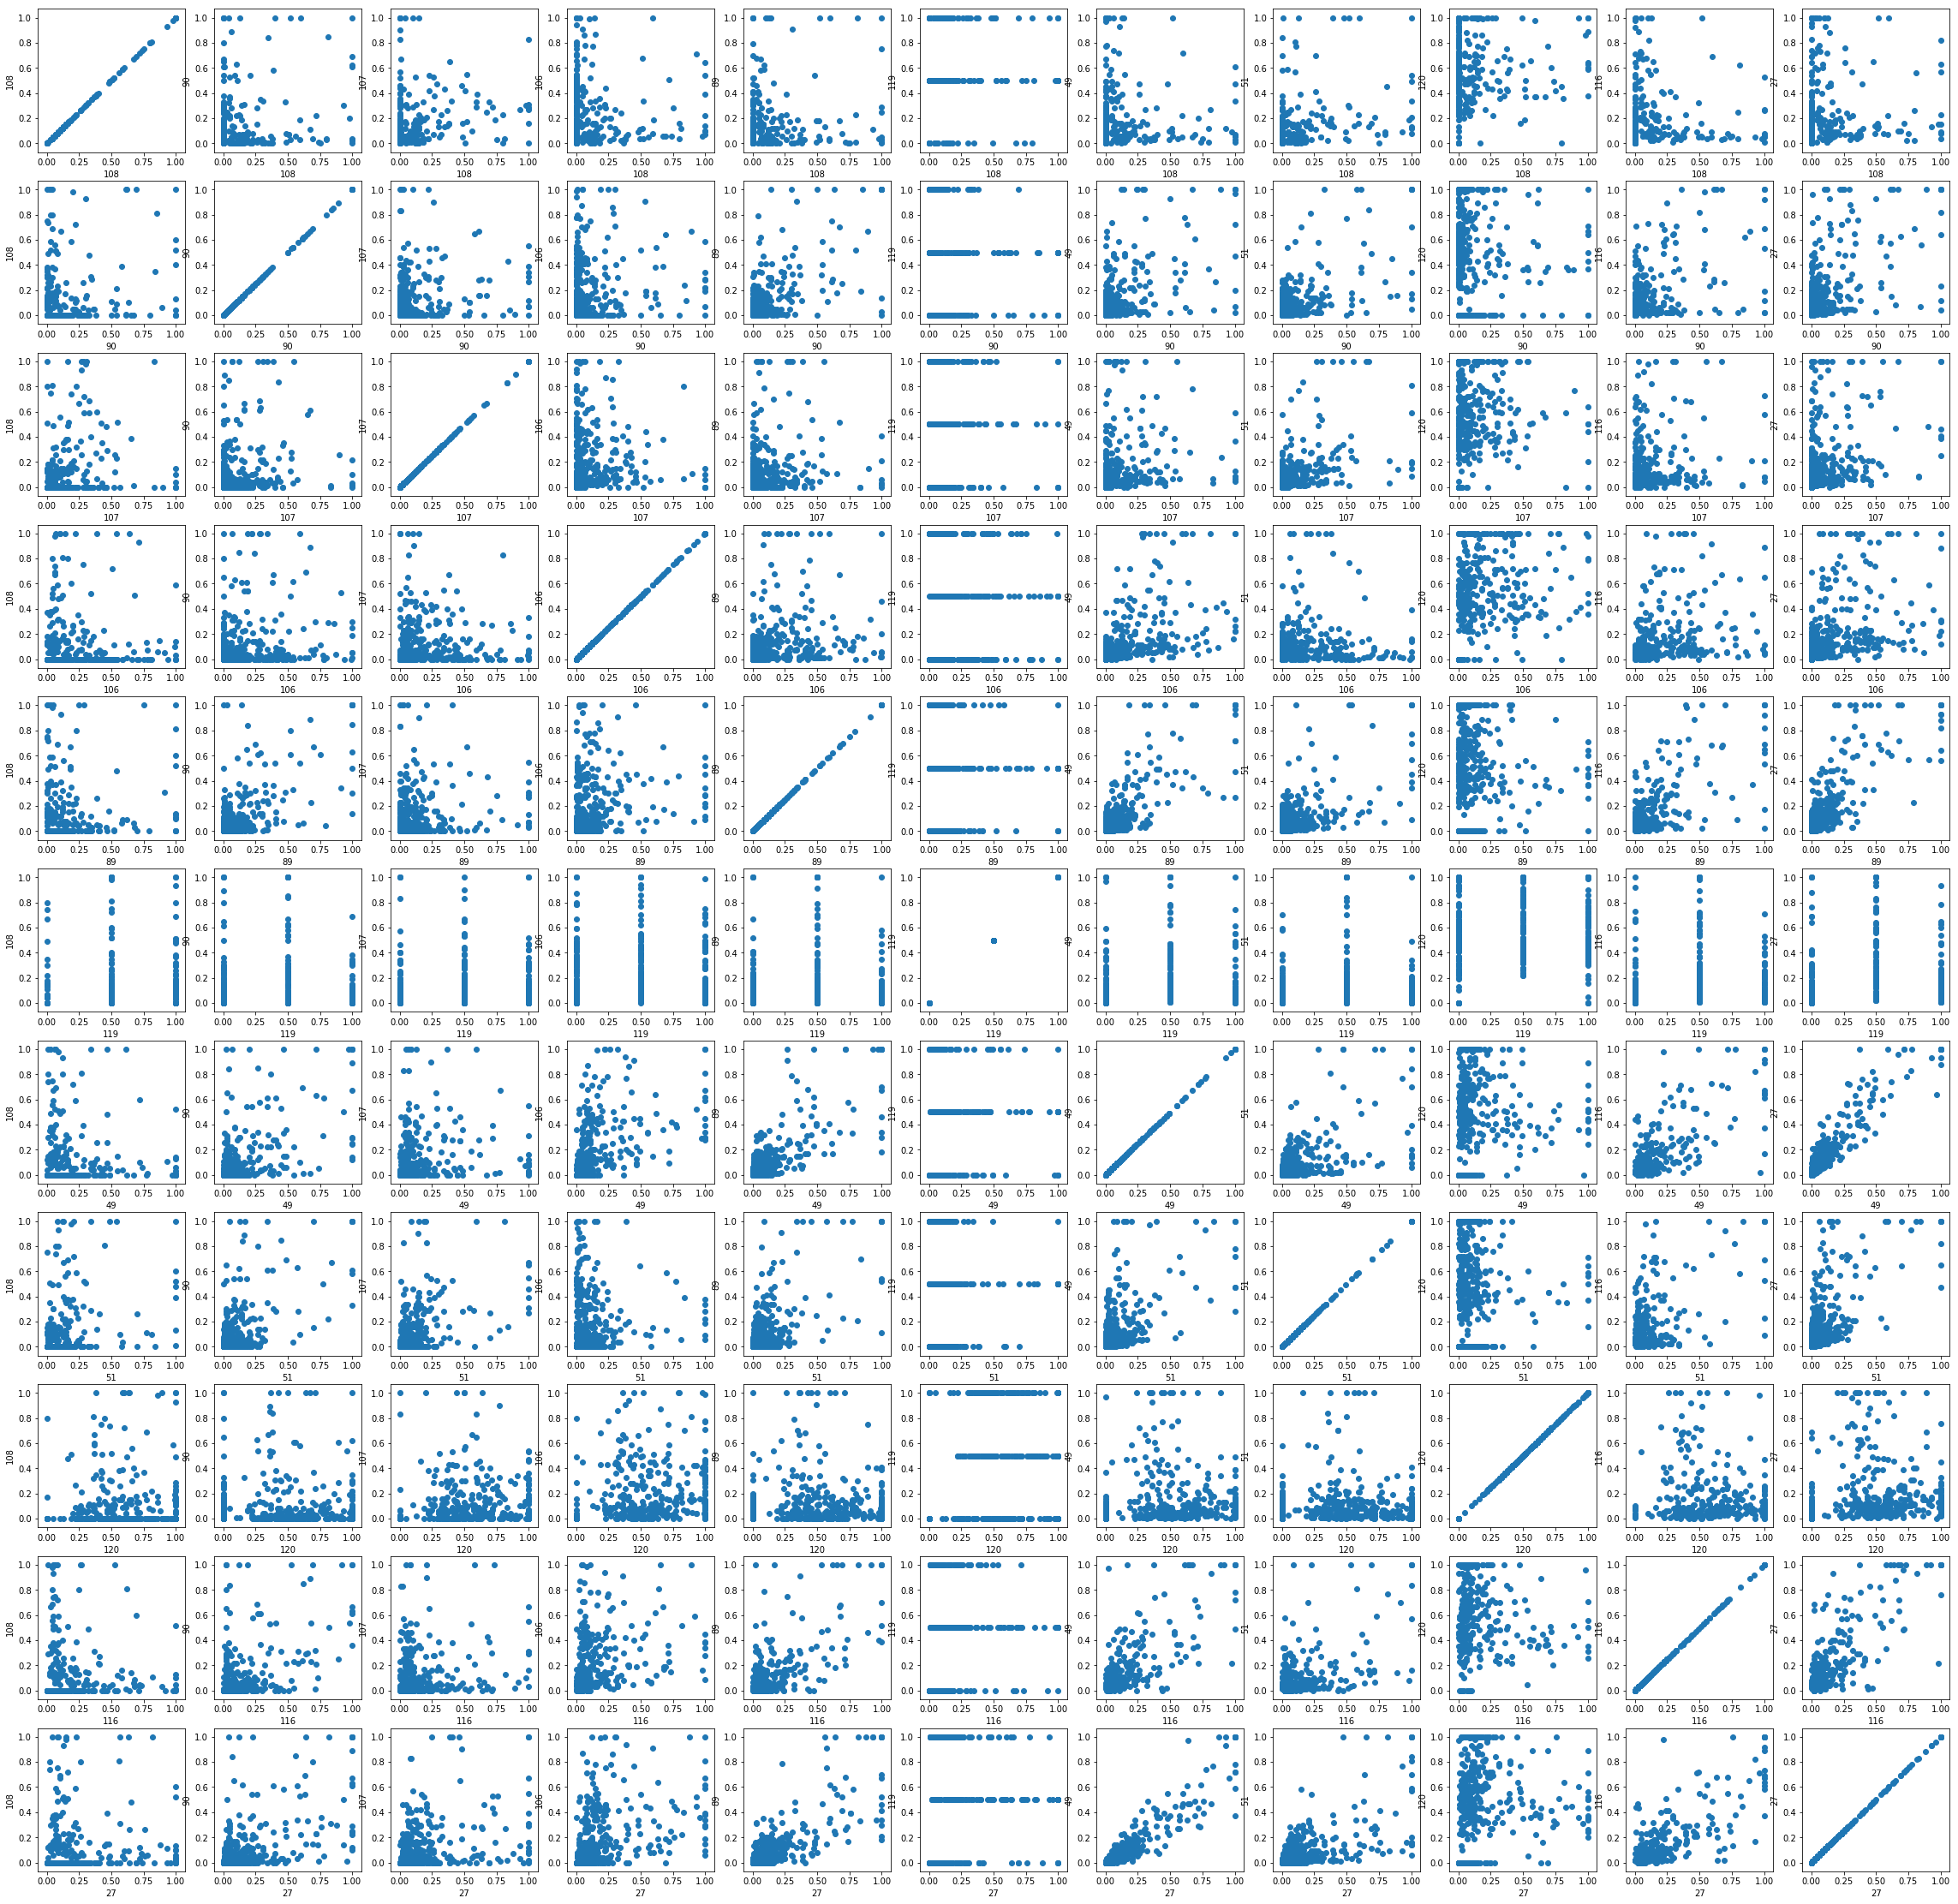

In [113]:
#scatter plot for 11 predictors(1e)

plt.figure(figsize =(40,40))
cnt = 0
for val1 in indlst:
    for val2 in indlst:
        plt.subplot(11,11,cnt+1)
        plt.scatter(pdf[pdf.columns[val1]], pdf[pdf.columns[val2]])
        plt.xlabel(val1)
        plt.ylabel(val2)
        cnt+=1
plt.savefig("scatters.png")
plt.show()
# print(1)

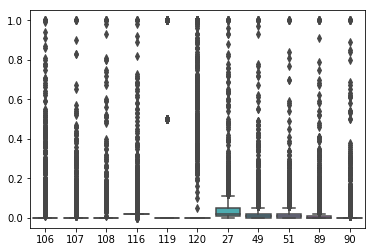

In [125]:
#boxplot(1e)
import seaborn as sea
d=  {}

for v in indlst:
#     plt.boxplot(pdf[pdf.columns[v]])
    d[str(v)] = pdf[pdf.columns[v]].tolist()
ptstruct = pd.DataFrame(d)
sea.boxplot(data=ptstruct)
plt.savefig("box.png")
plt.show()

In [115]:
#linear regression 1-f
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
X_train = traindata[traindata.columns[:-1]]
y_train = traindata[traindata.columns[-1]].values.reshape(-1, 1)
X_test = testdata[testdata.columns[:-1]]
y_test = testdata[testdata.columns[-1]].values.reshape(-1, 1)
regfit = reg.fit(X_train, y_train)
y_pred = regfit.predict(X_test)
y_score = regfit.score(X_test, y_test)
print(mean_squared_error(y_pred, y_test))
print(y_score)

0.0179989158879
0.62151609457


In [116]:
#ridge regression (1g)
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFpr
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
#best Result for ridge
alphalst = [0.0001,0.001,0.01,0.1,0.3,0.5,1.0,2.0,5.0,10.0]
tmp = []
for val in alphalst:
    kfold = model_selection.KFold(n_splits = 5, random_state = 33)
    rid = Ridge(alpha=val)
    results = -model_selection.cross_val_score(rid, X_train, y_train, cv = kfold, scoring = "neg_mean_squared_error")
    tmp.append(results.mean())

print("best alpha: ",alphalst[tmp.index(min(tmp))])
print("best MSE: ",min(tmp))

best alpha:  2.0
best MSE:  0.0190269895017


In [117]:
#test ridge
bestrid = Ridge(alpha =2)
bestird = bestrid.fit(X_train, y_train)
y_pred = bestrid.predict(X_test)

print(bestrid.score(X_test, y_test))
print(mean_squared_error(y_pred, y_test))

0.632210396725
0.0174903451344


In [118]:
#best result for Lasso(1h)
from sklearn.linear_model import Lasso
tmp2 = []
# newalphalst = [0.001,0.01,0.1,0.3,0.5,1.0,2.0,5.0,10.0]
for val in alphalst:
    kfold2 = model_selection.KFold(n_splits = 5, random_state = 33)
    las = Lasso(alpha=val)
    results2 = -model_selection.cross_val_score(las, X_train, y_train, cv = kfold2,scoring = "neg_mean_squared_error")
    tmp2.append(results2.mean())
print("best alpha: ",alphalst[tmp2.index(min(tmp2))])
print("best MSE: ",min(tmp2))

best alpha:  0.0001
best MSE:  0.0189755358396


In [119]:
#test lasso
bestlas = Lasso(alpha = 0.0001)
bestlas = bestlas.fit(X_train, y_train)
y_pred = bestlas.predict(X_test)
print(bestlas.score(X_test, y_test))
print(mean_squared_error(y_pred, y_test))

0.629698571218
0.0176097957514


In [120]:
#normalized lasso
from sklearn.preprocessing import normalize
n_Xtrain = normalize(X_train)
n_Xtest = normalize(X_test)
tmp2 = []

for val in alphalst:
    kfold2 = model_selection.KFold(n_splits = 5, random_state = 33)
    las = Lasso(alpha=val)
    results2 = -model_selection.cross_val_score(las, n_Xtrain, y_train, cv = kfold2, scoring = "neg_mean_squared_error")
    tmp2.append(results2.mean())
print("best alpha: ",alphalst[tmp2.index(min(tmp2))])
print("best MSE: ",min(tmp2))
# n_ytrain = normalize(y_train, axis = 1)
# n_ytest = normalize(y_test, axis =1)

best alpha:  0.0001
best MSE:  0.0192827157967


In [121]:
#normalized Lasso test
bestlas = Lasso(alpha = 0.0001)
bestlas = bestlas.fit(n_Xtrain, y_train)
y_pred = bestlas.predict(n_Xtest)
print(bestlas.score(n_Xtest, y_test))
print(mean_squared_error(y_pred, y_test))

0.632853092016
0.0174597815666


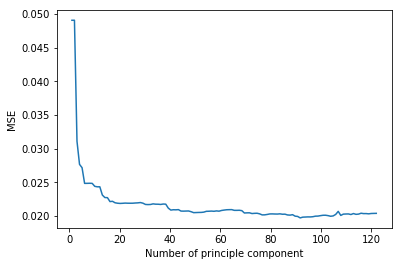

In [122]:
from sklearn.decomposition import PCA
#use pca test on every possible reduction on all features and report mse(1i)
# len(X_train_reduced)
scorepca=[]
pca = PCA()
for i in range(1,122):
    kfold = model_selection.KFold(n_splits = 5, random_state = 33)

    X_train_reduced = pca.fit_transform(X_train)
    lreg = LinearRegression()
    results = model_selection.cross_val_score(lreg, n_Xtrain[:,:i], y_train, cv = kfold, scoring='neg_mean_squared_error')
    scorepca.append(-results.mean())
#plot against pca
plt.plot(np.linspace(1,122,num= 121), scorepca)
plt.xlabel("Number of principle component")
plt.ylabel("MSE")
plt.savefig("PCA.png")
plt.show()

In [123]:
#show best mse and # of component
print(scorepca.index(min(scorepca))+1)
print(min(scorepca))

91
0.0197365922852


In [124]:
#now we start to generate a booster tree(1j)
# to find L1 we use alpha's list that previously used
import xgboost as xgb
dX_train=xgb.DMatrix(X_train, label = y_train)

tmpdict = {}
for val in alphalst:
    params = {"alpha":val}
    results = xgb.cv(params, dX_train, nfold = 5,show_stdv = False)
    tmpdict[val]=(results["test-rmse-mean"].mean())
print(tmpdict)

#0.5: 0.17642518 gives the minimum       

{0.0001: 0.17949629999999997, 0.001: 0.17948322, 0.01: 0.17956934000000002, 0.1: 0.17927214, 0.3: 0.17917864, 0.5: 0.17635338000000003, 1.0: 0.17732105999999997, 2.0: 0.17722484, 5.0: 0.18027916000000002, 10.0: 0.183492}
